In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('insurance.csv')

print(df.head(3))
print(df.info())
print(df.describe())

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  1211

In [ ]:
#df['smoker']=df['smoker'].map({'no':1,'yes':0})
#df['sex']= df['sex'].map({'female':0,'male':1})
#df.isnull().sum()
#df.head(3)

df.isnull().sum()
df.head(3)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620

In [ ]:
n_file = pd.get_dummies(df,drop_first=True)
n_file.head(3)

age    bmi  children     charges  sex_male  smoker_yes  region_northwest  \
0   19  27.90         0  16884.9240     False        True             False   
1   18  33.77         1   1725.5523      True       False             False   
2   28  33.00         3   4449.4620      True       False             False   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False

Features and target

In [ ]:
x = n_file.drop('charges',axis=1)
y = n_file['charges']

x.head(3)
y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Absolute Error (MAE): 4181.19447375365
R² Score: 0.7835929767120724


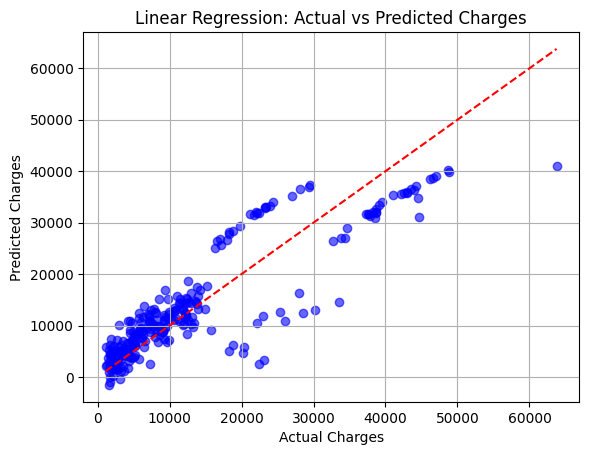

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.grid(True)
plt.show()
